<a href="https://www.kaggle.com/code/shubhamgupta012/eda-on-climate-insights-dataset?scriptVersionId=133457018" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/climate-insights-dataset/climate_change_data.csv
/kaggle/input/climate-insights-dataset/Readme.md


In [2]:
df = pd.read_csv('/kaggle/input/climate-insights-dataset/climate_change_data.csv')
df.head()

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [3]:
df.shape

(10000, 9)

In [4]:
df.describe()

,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,14.936034,400.220469,-0.003152,49.881208,49.771302,25.082066
std,5.030616,49.696933,0.991349,28.862417,28.929320,14.466648
min,-3.803589,182.131220,-4.092155,0.010143,0.018998,0.001732
25%,11.577991,367.109330,-0.673809,24.497516,24.713250,12.539733
50%,14.981136,400.821324,0.002332,49.818967,49.678412,24.910787
75%,18.305826,433.307905,0.675723,74.524991,75.206390,37.670260
max,33.976956,582.899701,4.116559,99.991900,99.959665,49.997664


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.2+ KB


In [6]:
df.dtypes

Date               object
Location           object
Country            object
Temperature       float64
CO2 Emissions     float64
Sea Level Rise    float64
Precipitation     float64
Humidity          float64
Wind Speed        float64
dtype: object

In [7]:
df.isnull().sum()

Date              0
Location          0
Country           0
Temperature       0
CO2 Emissions     0
Sea Level Rise    0
Precipitation     0
Humidity          0
Wind Speed        0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df['Country'].value_counts()

Congo                        94
Korea                        76
Tanzania                     61
Armenia                      58
French Guiana                58
                             ..
Saint Pierre and Miquelon    28
Chile                        28
Dominican Republic           28
Syrian Arab Republic         27
Saint Kitts and Nevis        23
Name: Country, Length: 243, dtype: int64

In [10]:
df['Location'].value_counts()

North David          12
Lake James           11
New James            10
West John            10
Lake Michael         10
                     ..
South Corey           1
Madisonborough        1
Lake Matthewberg      1
North Williamton      1
West Anthonyburgh     1
Name: Location, Length: 7764, dtype: int64

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_20/1864910268.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature'])


<Axes: xlabel='Temperature', ylabel='Density'>

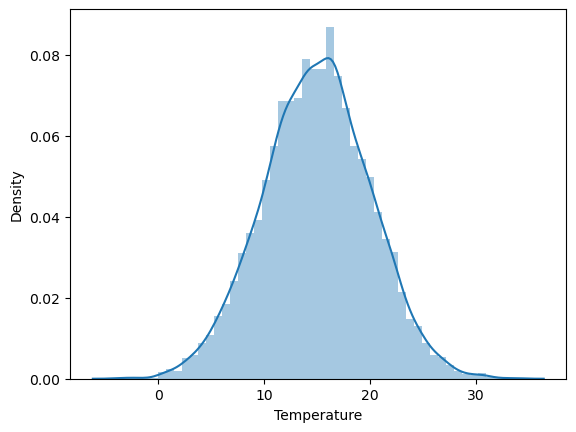

In [12]:
sns.distplot(df['Temperature'])

Text(0.5, 0, 'CO2 Emissions')

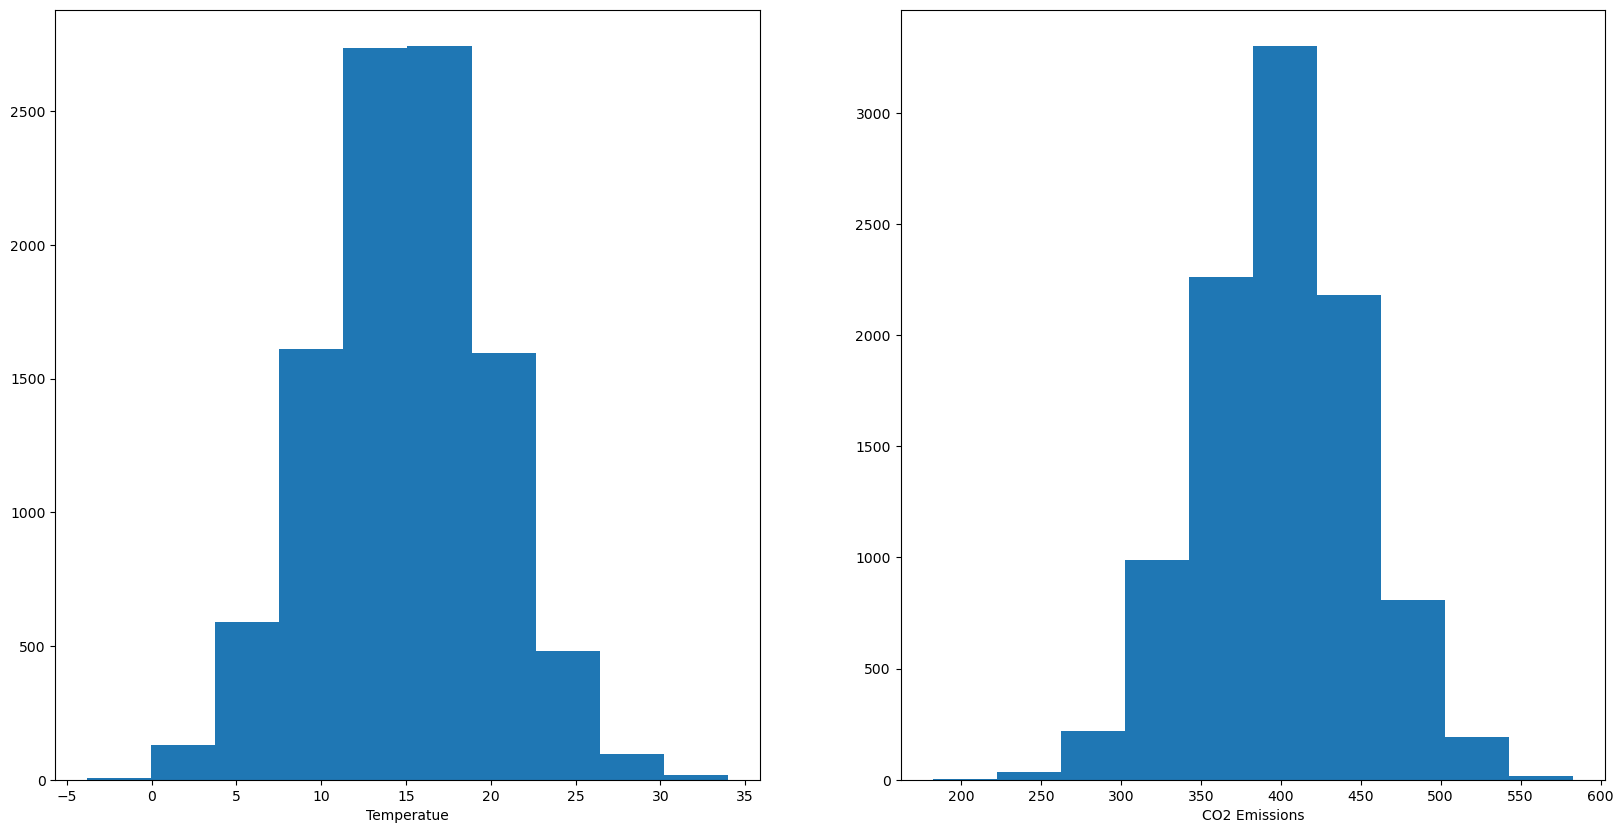

In [13]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.hist(df['Temperature'])
plt.xlabel('Temperatue')
plt.subplot(1,2,2)
plt.hist(df['CO2 Emissions'])
plt.xlabel('CO2 Emissions')

Text(0.5, 0, 'Precipitation')

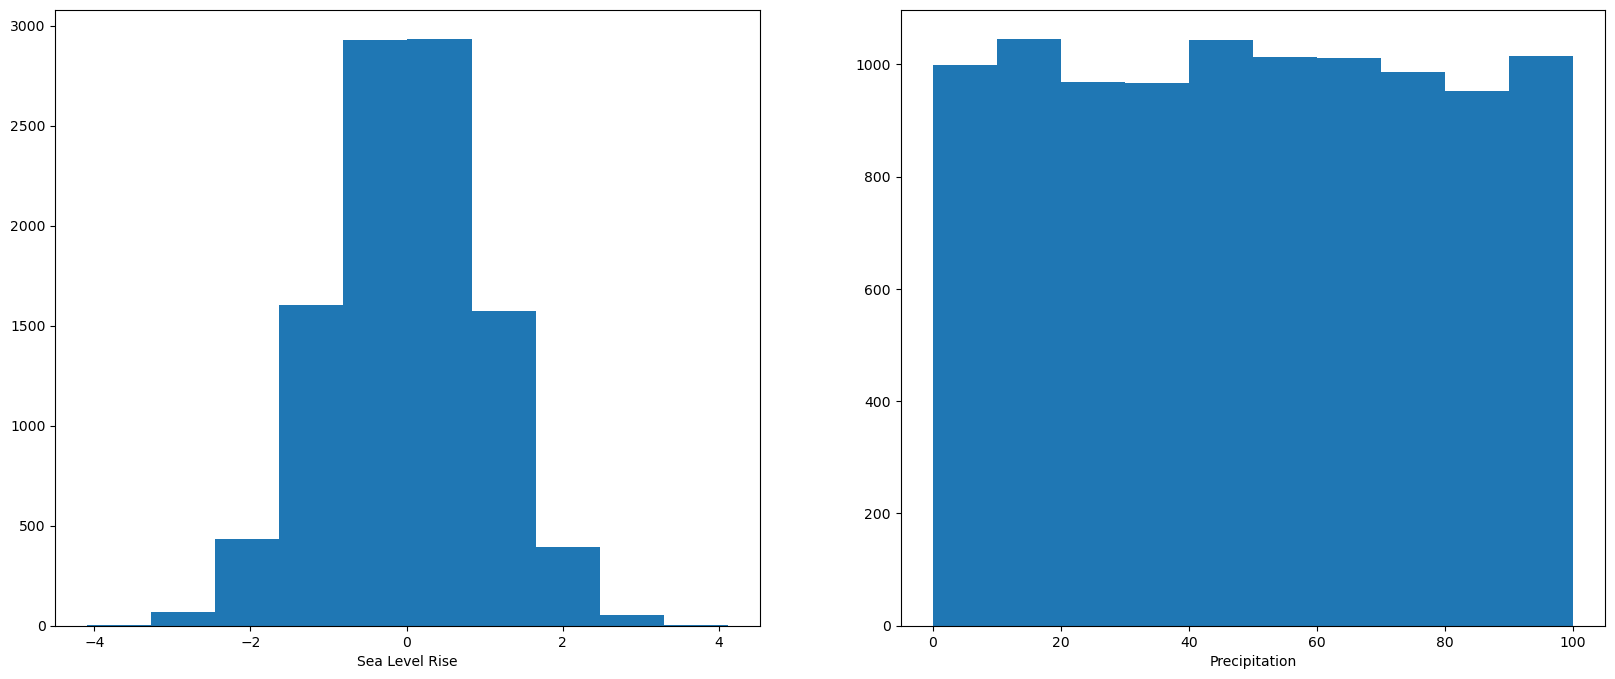

In [14]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hist(df['Sea Level Rise'])
plt.xlabel('Sea Level Rise')
plt.subplot(1,2,2)
plt.hist(df['Precipitation'])
plt.xlabel('Precipitation')

Text(0.5, 0, 'Wind Speed')

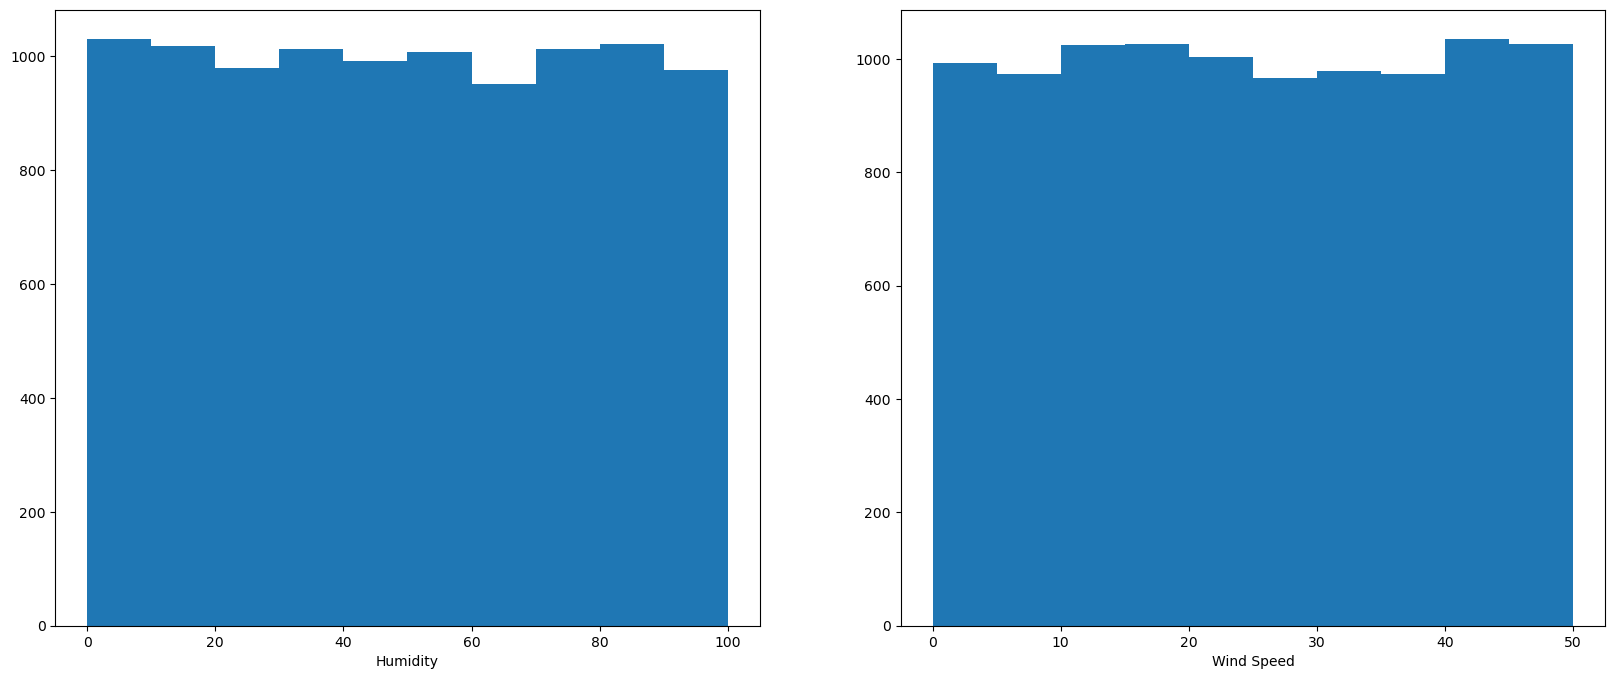

In [15]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.hist(df['Humidity'])
plt.xlabel('Humidity')
plt.subplot(1,2,2)
plt.hist(df['Wind Speed'])
plt.xlabel('Wind Speed')

Wind Speed and Humidity is nearly same